# Project: Wrangling and Analyze Data

## Data Gathering

In this data wrangling and analysis project, three datasets will be used. These datasets are:
1. *twitter_archive_enhanced* dataset, shortened as **df1**.
2. *image_predictions.tsv* dataset, shortened as **df2**.
3. *tweet_json.txt* dataset, shortened as **df3**.


**The datasets for this project are gathered in the following cells below, starting with df1.**

In [1]:
import pandas as pd
import warnings as ws
ws.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**Gathering df2 (image_predictions.tsv) using the Requests library.**

In [3]:
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image-predictions.tsv', mode = 'wb') as f:
    f.write(r.content)

df2=pd.read_csv('image-predictions.tsv',sep='\t')
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Gathering df3 (tweet_json.txt) using the tweepy library.**

In [ ]:
import tweepy
# Inserting the Keys
consumer_key = '...'
consumer_secret = '...'
access_token = '...'
access_secret = '...'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

import json

page_no_exist = []
df3 = []
#Writing and Reading Twitter JSON
with open('tweet_json.txt', mode="w") as file:
    for i in list(df1['tweet_id']):
        try:
            tweet = api.get_status(str(i))
            file.write(json.dumps(tweet._json))
            df3.append({
                "tweet_id" : str(i),
                "retweet_count" : tweet._json['retweet_count'],
                "favorite_count" : tweet._json['favorite_count']
            })
        except:
            page_no_exist.append(i)

In [4]:
#Reading into a pandas DF
df3 = pd.DataFrame(df3, columns=["tweet_id",'retweet_count', 'favorite_count'])
df3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33819
1,892177421306343426,5301,29336
2,891815181378084864,3481,22060
3,891689557279858688,7227,36946
4,891327558926688256,7762,35314


## Data Assessment

Now that our datasets have been gathered, we can now proceed to data assessment in this section.

### Assessing df1

In [5]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
df1.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [7]:
df1.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
543,805958939288408065,NaN,NaN,2016-12-06 02:15:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Penny. She fought a bee...,7.827226e+17,4.196984e+09,2016-10-02 23:23:04 +0000,https://twitter.com/dog_rates/status/782722598...,10,10,Penny,None,None,None,None
497,813142292504645637,NaN,NaN,2016-12-25 22:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everybody stop what you're doing and look at t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813142292...,13,10,None,None,None,None,None
1449,696100768806522880,NaN,NaN,2016-02-06 22:38:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This poor pupper has been stuck in a vortex si...,NaN,NaN,NaN,https://vine.co/v/i1KWj0vbvA9,10,10,None,None,None,pupper,None
919,756526248105566208,NaN,NaN,2016-07-22 16:28:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",All hail sky doggo. 13/10 would jump super hig...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756526248...,13,10,None,doggo,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None
1399,699691744225525762,NaN,NaN,2016-02-16 20:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dave. He's a tropical pup. Short lil l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699691744...,5,10,Dave,None,None,None,None
1829,676237365392908289,NaN,NaN,2015-12-14 03:08:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Winston. He has no respect for th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676237365...,8,10,Winston,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
1252,710844581445812225,NaN,NaN,2016-03-18 15:05:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Staniel. His selfie game is strong af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710844581...,10,10,Staniel,None,None,None,None
1354,703631701117943808,NaN,NaN,2016-02-27 17:24:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. Based on this picture she's at ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703631701...,11,10,Bella,None,None,None,None


In [8]:
df1.shape

(2356, 17)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
df1.duplicated().sum()

0

In [11]:
df1.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
df1.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [13]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### Assessing df2

In [14]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
df2.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [16]:
df2.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
66,667176164155375616,https://pbs.twimg.com/media/CUJJLtWWsAE-go5.jpg,1,soft-coated_wheaten_terrier,0.318981,True,Lakeland_terrier,0.215218,True,toy_poodle,0.106014,True
92,667546741521195010,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,1,toy_poodle,0.787424,True,miniature_poodle,0.202225,True,teddy,0.004047,False
282,671134062904504320,https://pbs.twimg.com/media/CVBY3e7XIAAAE4Y.jpg,1,Shih-Tzu,0.180380,True,golden_retriever,0.180194,True,Labrador_retriever,0.173656,True
638,681281657291280384,https://pbs.twimg.com/media/CXRmDfWWMAADCdc.jpg,1,Saint_Bernard,0.998830,True,Pekinese,0.000391,True,Great_Pyrenees,0.000224,True
1324,756939218950160384,https://pbs.twimg.com/media/CoEwMXeWEAAaIz5.jpg,1,golden_retriever,0.790371,True,cocker_spaniel,0.130268,True,Labrador_retriever,0.064629,True
1589,798628517273620480,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
1856,841439858740625411,https://pbs.twimg.com/media/C61lFFiWoAAJdiL.jpg,3,military_uniform,0.853684,False,Labrador_retriever,0.048200,True,groenendael,0.015394,True
981,707377100785885184,https://pbs.twimg.com/media/CdEbt0NXIAQH3Aa.jpg,1,golden_retriever,0.637225,True,bloodhound,0.094542,True,cocker_spaniel,0.069797,True
735,687096057537363968,https://pbs.twimg.com/media/CYkON6CVAAAPXAc.jpg,1,Labrador_retriever,0.417107,True,Chesapeake_Bay_retriever,0.341730,True,German_short-haired_pointer,0.177702,True
1154,732732193018155009,https://pbs.twimg.com/media/CiswCQhWYAI5-QW.jpg,1,koala,0.162935,False,Staffordshire_bullterrier,0.127969,True,mongoose,0.096421,False


In [17]:
df2.shape

(2075, 12)

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
df2.duplicated().sum()

0

In [20]:
df2.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [21]:
df2.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [22]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Assessing df3

In [23]:
df3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33819
1,892177421306343426,5301,29336
2,891815181378084864,3481,22060
3,891689557279858688,7227,36946
4,891327558926688256,7762,35314


In [24]:
df3.tail()

,tweet_id,retweet_count,favorite_count
2322,666049248165822465,37,89
2323,666044226329800704,115,246
2324,666033412701032449,36,100
2325,666029285002620928,39,112
2326,666020888022790149,423,2293


In [25]:
df3.sample(10)

,tweet_id,retweet_count,favorite_count
1542,687732144991551489,598,1624
922,752173152931807232,1674,5550
1079,734776360183431168,489,2328
826,765669560888528897,1133,4859
1083,733482008106668032,855,2885
1173,716447146686459905,5326,12038
1999,671866342182637568,420,999
2003,671763349865160704,776,1495
965,748575535303884801,1814,5642
1537,688064179421470721,325,1601


In [26]:
df3.shape

(2327, 3)

In [27]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [28]:
df3.duplicated().sum()

0

In [29]:
df3.isna().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [30]:
df3.nunique()

tweet_id          2327
retweet_count     1671
favorite_count    1973
dtype: int64

In [31]:
df3.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2471.764074,7054.366996
std,6.820795e+16,4185.736183,10961.361928
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,494.500000,1226.000000
50%,7.178418e+17,1149.000000,3051.000000
75%,7.986547e+17,2861.500000,8607.000000
max,8.924206e+17,70759.000000,144836.000000


### Quality issues

df1
1. Missing Data: 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'name'.

2. Rows with NaN value of expenaded_url are comments without image. 

3. Wrong data range: rating_denominator was meant to be fixed at 10.

4. Wrong datatype: 'tweet_id', 'timestamp'.

5. Name column contains false names.

df2

6. 'Tweet_id' has a wrong datatype

7. Inconsistent dog breed names.

df3

8. 'Tweet_id' has a wrong datatype.

### Tidiness issues
df1

9. Type of dogs such as doggo,floofer, pupper, puppo should be in a single column

10. Many columns across datasets, especially from df1 and df2, need to be renamed.

## Data Cleaning
In this section, **all** of the issues I have documented above while assessing will be cleaned. 

In [32]:
# Make copies of original pieces of data
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

## DF1

### Issue #1: *Large amount of Missing Data: 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'source'*

#### Define:
Drop the following columns *'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'source'*

#### Code

In [33]:
df1_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 
                        'retweeted_status_id', 'retweeted_status_user_id', 
                        'retweeted_status_timestamp', 'source'], inplace=True)

#### Test

In [34]:
df1_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #2: *Rows with NaN value of expenaded_url are comments without image.*

#### Define
Drop rows with NaN values of expanded_url

#### Code

In [35]:
df1_clean.dropna(subset=['expanded_urls'],inplace=True)

#### Test

In [36]:
df1_clean.loc[df1['expanded_urls'].isna()]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #3: *Wrong data range: rating_denominator was meant to be fixed at 10*

#### Define:
Set all *rating_denominator* entries to 10

#### Code

In [37]:
df1_clean.loc[df1_clean['rating_denominator']>10,'rating_denominator']=10

#### Test

In [38]:
df1_clean['rating_denominator'].max()

10

### Issue #4: *Wrong datatype: 'tweet_id', 'timestamp'.*

#### Define:
Change the datatype for both *tweet_id* and *timestamp* to *string* and *datetime* respectively.

#### Code

In [39]:
#correcting the datatype for tweet_id
df1_clean['tweet_id'] = df1_clean['tweet_id'].astype('str')

#correcting the datatype for tweet_id
import datetime as dt
df1_clean['timestamp']=pd.to_datetime(df1_clean['timestamp'])

#### Test

In [40]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2297 non-null object
timestamp             2297 non-null datetime64[ns]
text                  2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
name                  2297 non-null object
doggo                 2297 non-null object
floofer               2297 non-null object
pupper                2297 non-null object
puppo                 2297 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 215.3+ KB


### Issue #5: *Name column contains false names.*

#### Define:
Clean the false names like 'a' or 'an' in the column and replace with None since they are incorrect.

#### Code

In [41]:
wrong_name = list(df1_clean.query('name == "a" or name == "an"').index)
for i in wrong_name:     
    df1_clean['name'][i] = "None"

#### Test

In [42]:
for i in wrong_name:
    if df1_clean['name'][i] != "None":
        print("wrong name")


## DF2

### Issue #6: *'Tweet_id' has a wrong datatype*

#### Define:
Change the datatype for *Tweet_id* to string.

#### Code

In [43]:
df2_clean['tweet_id']=df2_clean['tweet_id'].astype('str')

#### Test

In [44]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #7: *Inconsistent dog breed names*

#### Define:
replace underscore "_" with space.

#### Code

In [45]:
# Replacing "_" with space (" ") in p1,p2 and p3
cols = ['p1','p2','p3']
for i in cols:
    df2_clean[i] = df2_clean[i].replace(
    regex=r'(_)', value=' ').str.title()

#### Test

In [46]:
df2_clean['p1']

0            Welsh Springer Spaniel
1                           Redbone
2                   German Shepherd
3               Rhodesian Ridgeback
4                Miniature Pinscher
5              Bernese Mountain Dog
6                        Box Turtle
7                              Chow
8                     Shopping Cart
9                  Miniature Poodle
10                 Golden Retriever
11                    Gordon Setter
12                     Walker Hound
13                              Pug
14                       Bloodhound
15                            Lhasa
16                   English Setter
17                              Hen
18                 Desktop Computer
19                Italian Greyhound
20                      Maltese Dog
21                 Three-Toed Sloth
22                               Ox
23                 Golden Retriever
24                         Malamute
25                       Guinea Pig
26      Soft-Coated Wheaten Terrier
27                        Ch

In [47]:
df2_clean['p2']

0                         Collie
1             Miniature Pinscher
2                       Malinois
3                        Redbone
4                     Rottweiler
5               English Springer
6                     Mud Turtle
7                Tibetan Mastiff
8                Shopping Basket
9                       Komondor
10               Tibetan Mastiff
11             Yorkshire Terrier
12              English Foxhound
13                  Bull Mastiff
14               German Shepherd
15                      Shih-Tzu
16                  Newfoundland
17                          Cock
18                          Desk
19                   Toy Terrier
20                    Toy Poodle
21                         Otter
22                  Newfoundland
23      Chesapeake Bay Retriever
24                Siberian Husky
25                         Skunk
26                  Afghan Hound
27                   Toy Terrier
28                    Bloodhound
29                    Barracouta
          

In [48]:
df2_clean['p3']

0                 Shetland Sheepdog
1               Rhodesian Ridgeback
2                        Bloodhound
3                Miniature Pinscher
4                          Doberman
5        Greater Swiss Mountain Dog
6                          Terrapin
7                          Fur Coat
8                  Golden Retriever
9       Soft-Coated Wheaten Terrier
10               Labrador Retriever
11                         Pekinese
12                     Ibizan Hound
13                   French Bulldog
14                         Malinois
15                   Dandie Dinmont
16                           Borzoi
17                        Partridge
18                         Bookcase
19                          Basenji
20                 Miniature Poodle
21                   Great Grey Owl
22                      Groenendael
23               Labrador Retriever
24                       Eskimo Dog
25                          Hamster
26                           Briard
27                         P

## DF3

### Issue #8: 'tweeter_id' has a wrong datatype

#### Define:
Change the datatype from number(int) to object(str).

#### Code

In [49]:
# Changing the datatype from integer to string.
df3_clean['tweet_id'] = df3_clean['tweet_id'].astype('str')

#### Test

In [50]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null object
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


## Tidiness Issues




## DF1

### Issue #9: Type of dogs such as *doggo, floofer, pupper, puppo* should be in a single column.

#### Define:
Type of dogs such as *doggo, floofer, pupper, puppo* should be in a single column. Other columns should be dropped.

#### Code

In [51]:
df1_clean['stage']=None 
# adding all the values from the four columns together, and then drop the "None" after that.
df1_clean['stage'] = df1_clean.doggo + df1_clean.floofer + df1_clean.pupper + df1_clean.puppo
df1_clean['stage'].value_counts()

NoneNoneNoneNone        1923
NoneNonepupperNone       243
doggoNoneNoneNone         80
NoneNoneNonepuppo         28
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: stage, dtype: int64

In [52]:
#Removing the 'None' in each row
import numpy as np
df1_clean['stage'] = df1_clean['stage'].map(lambda x: x.replace("None",""))
df1_clean['stage'] = df1_clean['stage'].replace(regex=r'', value= np.nan)
df1_clean['stage'].value_counts()

pupper          243
doggo            80
puppo            28
doggopupper      12
floofer           9
doggopuppo        1
doggofloofer      1
Name: stage, dtype: int64

In [53]:
#inserting comma between strings
df1_clean.loc[df1_clean['stage'] == 'doggopupper', 'stage'] = 'doggo, pupper'
df1_clean.loc[df1_clean['stage'] == 'doggopuppo', 'stage'] = 'doggo, puppo'
df1_clean.loc[df1_clean['stage'] == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [54]:
#deleting doggo, puppo, pupper and floofer columns
cols=['doggo', 'puppo', 'pupper', 'floofer']
for i in cols:
    del df1_clean[i]

#### Test

In [55]:
df1_clean['stage'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
       'doggo, floofer', 'doggo, pupper'], dtype=object)

### Issue #10: *Many columns across datasets, especially from df1 and df2, need to be renamed.*

#### Define: Rename the following columns in 
**df1_clean**
- *expanded_urls* to *image_url*
- *name* to *dog_name*

**and in df2_clean**
- *jpg_url* to *image_jpg_url*
- *p1* to *prediction1* 
- *p1_conf* to *prediction1_confidence*
- *p1_dog* to *prediction1_dog*
- *p2* to *prediction2* 
- *p2_conf* to *prediction2_confidence*
- *p2_dog* to *prediction2_dog*
- *p3* to *prediction3* 
- *p3_conf* to *prediction3_confidence*
- *p3_dog* to *prediction3_dog*

#### Code

In [56]:
# Renaming df1_clean columns
df1_clean.rename(columns={'expanded_urls': "image_url",
                          'name': "dog_name"}, inplace = True)
# Renaming df2_clean columns
df2_clean.rename(columns={'jpg_url': "image_jpg_url",
                          'p1':'prediction1', 'p1_conf':'prediction1_confidence','p1_dog':'prediction1_dog',
                          'p2':'prediction2', 'p2_conf':'prediction2_confidence','p2_dog': 'prediction2_dog',
                          'p3':'prediction3', 'p3_conf':'prediction3_confidence','p3_dog': 'prediction3_dog'}, inplace = True)

#### Test

In [57]:
print(df1_clean.columns)
print(df2_clean.columns)

Index(['tweet_id', 'timestamp', 'text', 'image_url', 'rating_numerator',
       'rating_denominator', 'dog_name', 'stage'],
      dtype='object')
Index(['tweet_id', 'image_jpg_url', 'img_num', 'prediction1',
       'prediction1_confidence', 'prediction1_dog', 'prediction2',
       'prediction2_confidence', 'prediction2_dog', 'prediction3',
       'prediction3_confidence', 'prediction3_dog'],
      dtype='object')


## Storing Data
The gathered, assessed, and cleaned master dataset will now be saved to a CSV file named "twitter_archive_master.csv".

In [58]:
from functools import reduce as rd
#creating a new list (L) Containing the cleaned datasets.
L = [df1_clean, df2_clean, df3_clean]
twitter_archive_master = rd(lambda left,right: pd.merge(left,right,on='tweet_id', how='inner'), L)
twitter_archive_master.to_csv('twitter_archive_master',index=False)

In [59]:
twitter_archive_master

,tweet_id,timestamp,text,image_url,rating_numerator,rating_denominator,dog_name,stage,image_jpg_url,img_num,...,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,7009,33819
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,5301,29336
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,3481,22060
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,7227,36946
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,7762,35314
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,...,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False,2602,17815
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,...,0.341703,True,Border Collie,0.199287,True,Ice Lolly,0.193548,False,1664,10354
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,...,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True,15757,56880
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,...,0.487574,True,Irish Setter,0.193054,True,Chesapeake Bay Retriever,0.118184,True,3622,24520
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,6101,27965


In [60]:
twitter_archive_master.columns

Index(['tweet_id', 'timestamp', 'text', 'image_url', 'rating_numerator',
       'rating_denominator', 'dog_name', 'stage', 'image_jpg_url', 'img_num',
       'prediction1', 'prediction1_confidence', 'prediction1_dog',
       'prediction2', 'prediction2_confidence', 'prediction2_dog',
       'prediction3', 'prediction3_confidence', 'prediction3_dog',
       'retweet_count', 'favorite_count'],
      dtype='object')

In [61]:
df=twitter_archive_master.copy()

## Data Analysis and Visualization

In the Exploratory data analysis stage, I will be answering the following questions:
1. Q1: On average, which dog stage is most liked?
2. Q2: Which dog is most liked?
3. Q3: What is the relationship between retweet_count and favorite_count?

### Q1: On average, which dog stage is most liked?

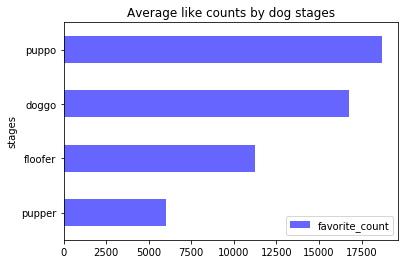

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

# filtering for rows with stages only
stage_only = df[df["stage"].isnull()==False]

#visualization 'Average like counts by dog stages'
by_stages = stage_only.query('stage=="pupper" or stage=="doggo" or stage=="puppo" or stage=="floofer"')

#Creating a new dataframe titled 'LikeCountsByStages'
LikeCountsByStages = pd.DataFrame(by_stages.groupby('stage')['favorite_count'].mean().sort_values())
LikeCountsByStages['stages'] = LikeCountsByStages.index

#Plotting Like count by stages
LikeCountsByStages.plot(x="stages",y='favorite_count',
                               kind='barh',title="Average like counts by dog stages",
                               color='b', alpha=0.6)
plt.show()

### Q2: which dog is most liked?

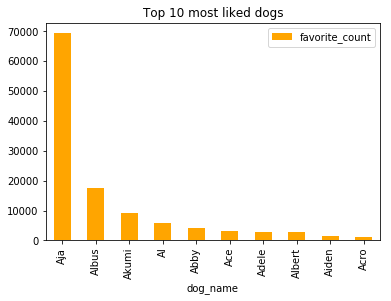

In [63]:
# Color for the bar plot
COLORS = ['orange']
Top10 = df.pivot_table('favorite_count', 'dog_name').head(10).sort_values(by='favorite_count',ascending=False)

#plotting the top10 most liked dogs
Top10.plot(kind='bar',color=COLORS,title='Top 10 most liked dogs')
plt.show()

### Q3: What is the relationship between retweet_count and favorite_count?

In [64]:
#defining a new function that calculates correlation coefficient
def corr(d1,d2):
    n1=np.array(d1)
    n2=np.array(d2)
    return np.corrcoef(n1,n2)

In [65]:
d1=twitter_archive_master['retweet_count']
d2=twitter_archive_master['favorite_count']
corr(d1,d2)

array([[ 1.        ,  0.86098732],
       [ 0.86098732,  1.        ]])

### Insights:
1. On average, Puppo is the most liked dog stage, while Pupper is the least liked.

2. Ranking 1st, Aja is the most liked dog, while Acro ranked 10th in the Top 10 list.

3. There is a **strong positive relationship** between retweet_count and favorite_count given by the correlation coefficient of **0.86098732**. However, this does not necessarily imply that increase/decrease in retweet_count causes favorite_count to move in the same direction.

### Visualization

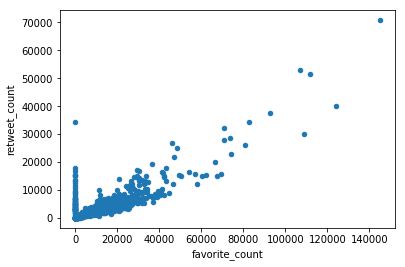

In [74]:
#Visualizing the relationship between retweet_count and favorite_count.
%matplotlib inline
twitter_archive_master.plot(x='favorite_count',y='retweet_count',kind='scatter')
plt.show()

### Conclusion:
In this project, I have examined the three datasets - tweeter_archive_enhanced, image_prediction, and tweet_json.txt. I have gathered, assessed and cleaned these datasets using both visual and programmatic means. A master dataset was also created by merging the three datasets listed above. Three questions were asked about the master dataset. Answering these questions revealed that:
- On average, Puppo is the most liked dog stage, while Pupper is the least liked.
- Aja is the most liked dog.
- There is a strong positive relationship between retweet_count and favorite_count.

### Limitations:

**Limitation 1**: The size of the datasets are not large enough to generalize about dogs in the world.

**Limitation 2**: There is no information as to how the breeds were predicted using the machine learning models. Thus, I can't confidently generalize the results of this project. There are no 100% sure things in our conclusions.